<a href="https://colab.research.google.com/github/kiranbk527/Data6000/blob/main/Dementia_Prevalence_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First run this cell in Colab to upload your CSV
from google.colab import files
uploaded = files.upload()


Saving Clean Prevalence data by age and sex.csv to Clean Prevalence data by age and sex.csv


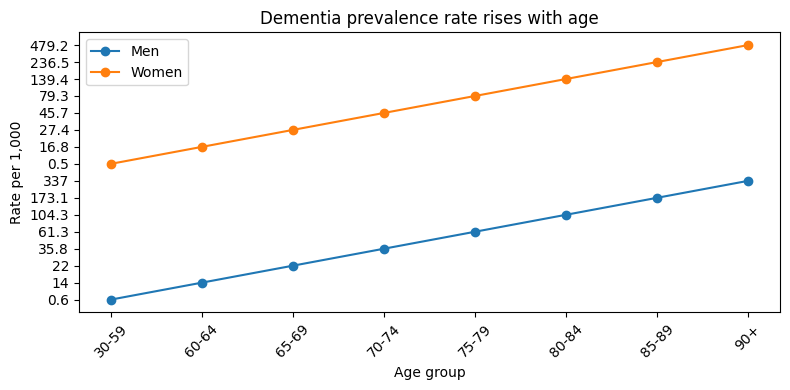

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load and clean
df = pd.read_csv("Clean Prevalence data by age and sex.csv", skiprows=1,
                 names=["Year","Sex","Age_Group","Number_Estimated","Rate_per_1000"])
df["Sex"] = df["Sex"].astype(str).str.strip().replace({"Woman":"Women"})
df = df[df["Sex"].isin(["Men","Women"])]

# Keep only valid age groups like 60-64, 85+
df = df[df["Age_Group"].apply(lambda x: bool(re.match(r"^\d{2}-\d{2}$", str(x)) or str(x).endswith("+")))]

# Sort by age
df["age_order"] = df["Age_Group"].apply(lambda x: int(str(x).replace("+","").split("-")[0]))
df = df.sort_values(["age_order","Sex"])

# Plot
plt.figure(figsize=(8,4))
for sex, d in df.groupby("Sex"):
    plt.plot(d["Age_Group"], d["Rate_per_1000"], marker='o', label=sex)
plt.title("Dementia prevalence rate rises with age")
plt.xlabel("Age group")
plt.ylabel("Rate per 1,000")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


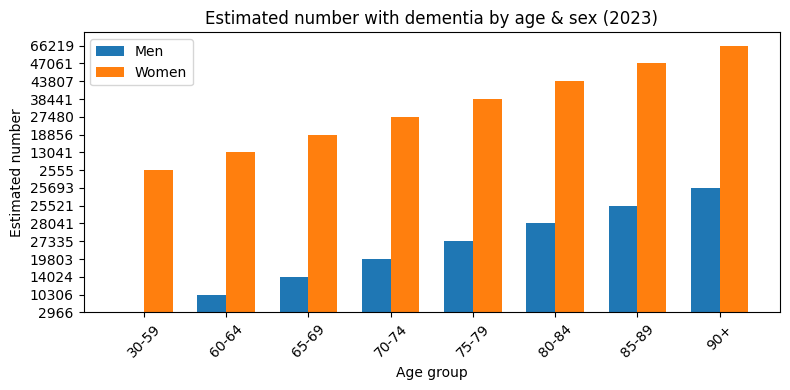

In [ ]:
import numpy as np

# Pivot table for counts
pivot_counts = df.pivot_table(index="Age_Group", columns="Sex", values="Number_Estimated", aggfunc="sum")
x = np.arange(len(pivot_counts.index))
w = 0.35

# Plot
plt.figure(figsize=(8,4))
plt.bar(x - w/2, pivot_counts["Men"].values, width=w, label="Men")
plt.bar(x + w/2, pivot_counts["Women"].values, width=w, label="Women")
plt.title("Estimated number with dementia by age & sex (2023)")
plt.xlabel("Age group")
plt.ylabel("Estimated number")
plt.xticks(x, pivot_counts.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


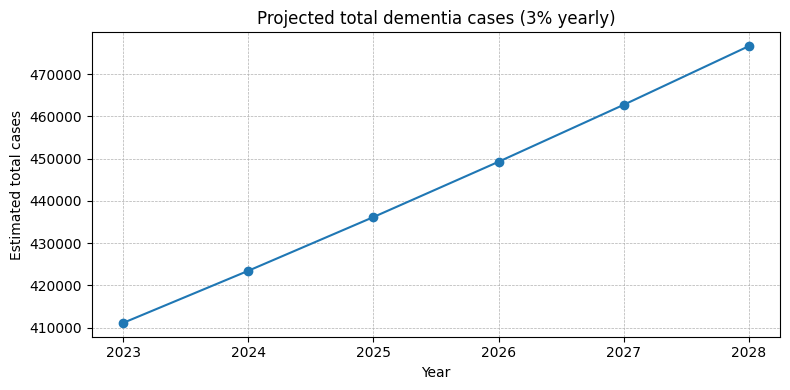

In [ ]:
# --- Projection of total dementia cases (self-contained) ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# 1) Load your file (make sure you've uploaded it in Colab)
csv = "Clean Prevalence data by age and sex.csv"
df = pd.read_csv(csv, skiprows=1,
                 names=["Year","Sex","Age_Group","Number_Estimated","Rate_per_1000"])

# 2) Clean types to avoid string math errors
df["Sex"] = df["Sex"].astype(str).str.strip().replace({"Woman":"Women"})
df["Number_Estimated"] = pd.to_numeric(df["Number_Estimated"], errors="coerce")
df["Rate_per_1000"]   = pd.to_numeric(df["Rate_per_1000"],   errors="coerce")
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# 3) Keep only Men/Women and real age groups (e.g., 60-64, 90+)
is_age = df["Age_Group"].astype(str).str.match(r"^\d{2}-\d{2}$|^\d{2}\+$")
base = df[df["Sex"].isin(["Men","Women"]) & is_age].copy()

# 4) Projection settings
growth_rate = 0.03   # change if needed (e.g., 0.025)
horizon_years = 5
base_year = int(base["Year"].dropna().iloc[0])

# 5) Compute projection safely (all numeric now)
total_base = base["Number_Estimated"].sum(skipna=True)
years = np.arange(base_year, base_year + horizon_years + 1, dtype=int)
proj = total_base * (1 + growth_rate) ** (years - base_year)

# 6) Plot
plt.figure(figsize=(8,4))
plt.plot(years, proj, marker='o')
plt.title(f"Projected total dementia cases ({int(growth_rate*100)}% yearly)")
plt.xlabel("Year"); plt.ylabel("Estimated total cases")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout(); plt.show()


Visual 4: Mode Age Group (Highest Vulnerability by Gender)

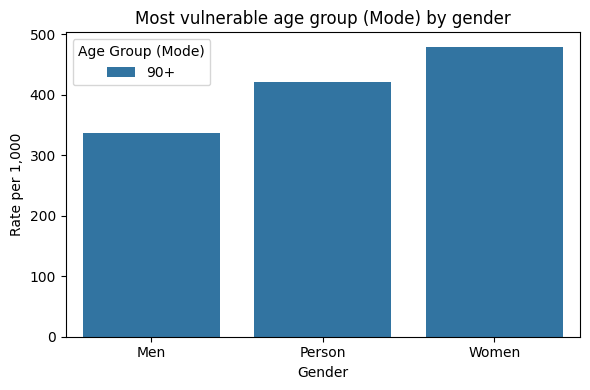

Mode results (highest dementia risk per gender):
       Sex Age_Group  Rate_per_1000
8      Men       90+          337.0
24  Person       90+          420.7
16   Women       90+          479.2


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows where Sex or Rate_per_1000 is missing
df_mode = df.dropna(subset=["Sex","Rate_per_1000"]).copy()

# Find the age group with the highest dementia rate for each gender
mode_age = df_mode.loc[df_mode.groupby("Sex")["Rate_per_1000"].idxmax(),
                       ["Sex","Age_Group","Rate_per_1000"]]

# Plot as a bar chart
plt.figure(figsize=(6,4))
sns.barplot(data=mode_age, x="Sex", y="Rate_per_1000", hue="Age_Group", dodge=False)

plt.title("Most vulnerable age group (Mode) by gender")
plt.ylabel("Rate per 1,000")
plt.xlabel("Gender")
plt.legend(title="Age Group (Mode)")
plt.tight_layout()
plt.show()

print("Mode results (highest dementia risk per gender):")
print(mode_age)
